In [1]:
# word to vector embeddings

In [2]:
# This code does not need an api key as this does not use openai, but this code uses NLTK and Punkt

In [3]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [4]:
import pandas as pd
import nltk
import string
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk import word_tokenize
from gensim.models import Word2Vec as w2v
from sklearn.decomposition import PCA

# constants
PATH = '/content/sample_data/shakespeare.txt'
sw = stopwords.words('english')
plt.style.use('ggplot')
# nltk.download('punkt')
# nltk.download('stopwords')

# import data
lines = []
with open(PATH, 'r') as f:
    for l in f:
        lines.append(l)

In [5]:
# remove new lines
lines = [line.rstrip('\n') for line in lines]

# make all characters lower
lines = [line.lower() for line in lines]

# remove punctuations from each line
lines = [line.translate(str.maketrans('', '', string.punctuation)) for line in lines]

# tokenize
lines = [word_tokenize(line) for line in lines]

def remove_stopwords(lines, sw = sw):
    '''
    The purpose of this function is to remove stopwords from a given array of
    lines.

    params:
        lines (Array / List) : The list of lines you want to remove the stopwords from
        sw (Set) : The set of stopwords you want to remove

    example:
        lines = remove_stopwords(lines = lines, sw = sw)
    '''

    res = []
    for line in lines:
        original = line
        line = [w for w in line if w not in sw]
        if len(line) < 1:
            line = original
        res.append(line)
    return res

filtered_lines = remove_stopwords(lines = lines, sw = sw)

In [6]:
print(len(filtered_lines))

111396


In [7]:
filtered_lines

[['act'],
 ['scene', 'london', 'palace'],
 ['enter',
  'king',
  'henry',
  'lord',
  'john',
  'lancaster',
  'earl',
  'westmoreland',
  'sir',
  'walter',
  'blunt',
  'others'],
 ['shaken', 'wan', 'care'],
 ['find', 'time', 'frighted', 'peace', 'pant'],
 ['breathe', 'shortwinded', 'accents', 'new', 'broils'],
 ['commenced', 'strands', 'afar', 'remote'],
 ['thirsty', 'entrance', 'soil'],
 ['shall', 'daub', 'lips', 'childrens', 'blood'],
 ['shall', 'trenching', 'war', 'channel', 'fields'],
 ['bruise', 'flowerets', 'armed', 'hoofs'],
 ['hostile', 'paces', 'opposed', 'eyes'],
 ['like', 'meteors', 'troubled', 'heaven'],
 ['one', 'nature', 'one', 'substance', 'bred'],
 ['lately', 'meet', 'intestine', 'shock'],
 ['furious', 'close', 'civil', 'butchery'],
 ['shall', 'mutual', 'wellbeseeming', 'ranks'],
 ['march', 'one', 'way', 'opposed'],
 ['acquaintance', 'kindred', 'allies'],
 ['edge', 'war', 'like', 'illsheathed', 'knife'],
 ['shall', 'cut', 'master', 'therefore', 'friends'],
 ['far', '

In [8]:
w = w2v(
    filtered_lines,
    min_count=3,
    sg = 1,
    window=7
)

print(w.wv.most_similar('thou'))
print(w.wv.most_similar('simple'))


emb_df = (
    pd.DataFrame(
        [w.wv.get_vector(str(n)) for n in w.wv.key_to_index],
        index = w.wv.key_to_index
    )
)
print(emb_df.shape)
emb_df.head(10)

[('art', 0.8201627731323242), ('thyself', 0.8182810544967651), ('villain', 0.7862075567245483), ('dost', 0.7695903778076172), ('hast', 0.7228137850761414), ('wherefore', 0.7014327049255371), ('traitor', 0.7000152468681335), ('slave', 0.6936804056167603), ('kill', 0.6912841796875), ('fellow', 0.6785329580307007)]
[('wisely', 0.9716209769248962), ('mistake', 0.9685301184654236), ('gentlewoman', 0.9648151397705078), ('always', 0.963115394115448), ('honourd', 0.961318850517273), ('robert', 0.959900975227356), ('youngest', 0.9576642513275146), ('follows', 0.9574688673019409), ('commends', 0.9562368988990784), ('cook', 0.9557915925979614)]
(11628, 100)


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
thou,0.108085,-0.035880,0.738135,0.693184,-0.514418,-0.476926,0.359398,0.477335,-0.353013,-0.249268,...,0.362481,-0.068025,0.376542,-0.012693,0.851362,0.665201,-0.590793,-0.541199,-0.034776,0.413160
thy,-0.106617,0.345751,0.388795,0.152489,0.220722,-0.258682,0.302814,0.588781,0.055812,-0.298393,...,0.254331,-0.195367,0.460508,-0.383836,0.526218,0.296872,-0.103178,-0.493293,0.028883,-0.055383
shall,0.140320,0.284876,0.214663,0.032537,0.433699,-0.078026,0.036236,0.321914,-0.280036,-0.005243,...,0.482069,0.174129,0.204960,-0.042601,0.472408,0.301496,0.127622,0.024636,0.406163,-0.001812
thee,-0.353816,0.222637,0.416538,0.267145,-0.137849,-0.346120,0.229731,0.598838,-0.103272,-0.154504,...,0.371060,-0.033095,0.144662,-0.003049,0.538996,0.418951,0.081651,-0.073545,0.334071,-0.056410
good,0.070110,0.272848,0.191755,-0.103022,-0.114797,-0.070212,0.275000,0.632297,-0.420249,0.010868,...,0.387092,-0.142223,0.280041,-0.038444,0.659366,-0.170175,0.096096,-0.211432,0.221859,0.090839
lord,-0.195200,-0.085082,0.129320,0.017762,-0.396832,-0.315981,0.391985,0.450723,-0.419644,-0.312432,...,0.403804,-0.019218,-0.141714,0.028116,0.352364,0.015971,0.062272,-0.113727,0.463243,-0.114636
come,0.159513,0.123567,0.413732,-0.142087,-0.003837,-0.099355,0.353566,0.251610,-0.378633,-0.253000,...,0.187861,-0.142235,0.364074,0.129840,0.342777,0.249413,0.170084,-0.283357,-0.043124,0.024817
sir,0.225808,-0.130229,0.103623,0.444298,-0.099742,-0.086418,0.437535,0.368454,-0.745593,-0.109601,...,0.353118,-0.010469,-0.548983,-0.110540,0.266025,0.380406,0.217809,-0.258019,0.375398,-0.137723
well,-0.292337,0.395388,0.105722,0.449414,-0.002897,-0.122794,0.409373,0.283358,-0.549083,-0.005604,...,0.485242,0.056579,0.130677,-0.020330,0.470826,0.385122,0.246275,0.051857,0.158522,0.159043
would,-0.075144,0.304171,0.021810,0.068246,0.143252,-0.194115,0.012877,0.749965,-0.165142,0.067649,...,0.384637,0.296991,-0.164951,0.060466,0.687072,0.033223,-0.174568,0.066776,0.544202,0.358997


[]

<Figure size 640x480 with 0 Axes>

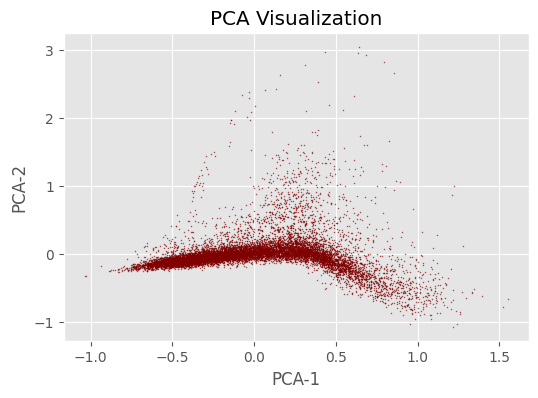

In [9]:
pca = PCA(n_components=2, random_state=7)
pca_mdl = pca.fit_transform(emb_df)

emb_df_PCA = (
    pd.DataFrame(
        pca_mdl,
        columns=['x','y'],
        index = emb_df.index
    )
)

plt.clf()
fig = plt.figure(figsize=(6,4))

plt.scatter(
    x = emb_df_PCA['x'],
    y = emb_df_PCA['y'],
    s = 0.4,
    color = 'maroon',
    alpha = 0.5
)

plt.xlabel('PCA-1')
plt.ylabel('PCA-2')
plt.title('PCA Visualization')
plt.plot()